##### Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### This dataset comprises 110,527 observations. It describes patient demographics and shows patients who booked appointment and the outcomes of those appointment, whether they missed or kept them. The following are the 14 columns in the dataset:

1. > **PatientID:** unique patient identifier
2. > **AppointmentID:** unique patient appointment id
3. > **Gender:** male or female
4. > **ScheduledDay:** day to see the doctor
5. > **AppointmentDay:** day a patient books an appointment
6. > **Age:** the age of the patient
7. > **Neighbourhood:** where the patient lives
8. > **Scholarship:** whether the patient is enjoying some healthcare benefits
9. > **Hipertension:** whether the patient has hypertension
10. > **Diabetes:** whether the patient has diabetes
11. > **Alcoholism:** whether the patient is an alcoholic
12. > **Handcap:** whether the patient is handicapped
13. > **SMS_received:** number of sms received by patient
14. > **No-show:** whether the patient visits the doctor on their appointment date



### Question(s) for Analysis

Questions to ask:

1. Which of the diseases has more influence on appointment outcome?
2. Which of the independent variables is more positively correlated with No-show?
3. How does age affect appointment outcomes?
4. Is there any relationship between the number of SMS received and No-show outcome?
5. How does gender affect appointment outcomes?
6. Is alcoholism related to appointment outcomes?
7. To what extent does scholarship affect appointment outcomes?

<a id='wrangling'></a>
## Data Wrangling

#### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape

(110527, 14)

##### I will check the dataset for null values

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### From the above information about the dataet, the data shows no missing data. 

##### I will proceed to cleaning, starting with checking for duplicates

### Data Cleaning

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


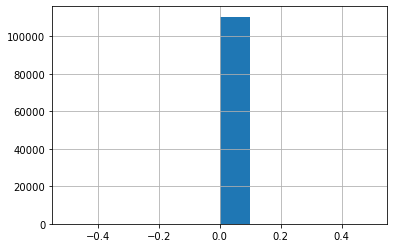

In [8]:
df.duplicated().hist();

##### From the chart above, the daata shows no duplicate value. 

##### Next, I will check for inconsistencies in age

##### I sorted by age in ascending order to see the minimum age.

In [9]:
df.sort_values(by='Age', ascending=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


##### From the output, observation 99832 has an age of -1 which is not logical. I will drop the observation.

In [10]:
df.drop(99832)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
df.sort_values(by='Age', ascending=False).head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No


##### Ages of 100 to 115 stil show as part of the normal distribution of age

In [12]:
df.sort_values(by='Handcap', ascending=False).head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No
78644,3.616644e+13,5608507,M,2016-04-20T13:56:51Z,2016-05-05T00:00:00Z,7,BONFIM,0,0,0,0,3,1,No
71457,5.229634e+14,5652195,F,2016-05-03T09:48:10Z,2016-05-06T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,1,No
69683,5.229634e+14,5684755,F,2016-05-11T09:05:23Z,2016-05-11T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
104931,3.995198e+12,5734979,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,0,0,0,1,3,0,No
104932,3.995198e+12,5734980,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,0,0,0,1,3,0,No
69781,5.229634e+14,5651451,F,2016-05-03T08:50:52Z,2016-05-03T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
28840,6.656653e+13,5586010,M,2016-04-15T07:12:28Z,2016-05-03T00:00:00Z,15,ROMÃO,0,0,0,0,3,1,Yes


##### The handcap column seem to have been swapped with SMS_received.  It makes sense that the number of SMS received might affect appointment decisions. I will rename the columns.

In [13]:
df.rename(columns = {'Handcap':'Sms_received', 'SMS_received':'Handicap'}, inplace=True)

In [14]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Sms_received,Handicap,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


###### I only need these columns: Gender, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Sms_received, Handicap, No-show. However, since No-show is binary, I will convert it to 0 and 1 for analysis.

In [15]:
df['No-show'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [16]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Sms_received,Handicap,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


##### I call my new table newdf

In [17]:
newdf = df[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Sms_received', 'No-show']]
newdf

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,Sms_received,No-show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,1,0,0
110523,F,51,0,0,0,0,1,0,0
110524,F,21,0,0,0,0,1,0,0
110525,F,38,0,0,0,0,1,0,0


##### I will make the No-show column my dependent variable Y, to explore the relationship that the other variables  X have with it

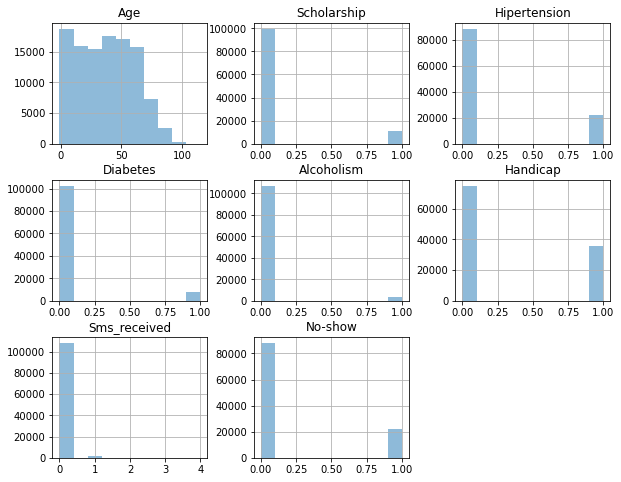

In [18]:
newdf.hist(alpha=0.5, figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

##### I'd create masks for the no-show variable for easy referencing and define functions for univariate and multivariate analysis

In [19]:
yes_noshow = df['No-show'] == True
no_noshow = df['No-show'] == False

In [20]:
def unigroupby (xvar, title, xlabel, ylabel):
    newdf.groupby(xvar)['No-show'].mean().plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()
    plt.show()

In [21]:
def multigroupby (xvar1, xvar2, title, xlabel, ylabel):
    newdf.groupby([xvar1, xvar2])['No-show'].mean().plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()
    plt.show()

### Research Question 1 (Which of the diseases has more relationship with appointment outcome?)

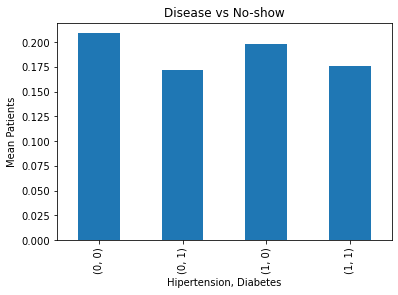

In [22]:
multigroupby ('Diabetes','Hipertension', 'Disease vs No-show', 'Hipertension, Diabetes', 'Mean Patients')

> Those with Hypertension are more likely than their counterpart to miss appointment, while those with diabetes are more slightly likely than their counterpart to keep appointment

### Research Question 2 (How does age affect appointment outcomes?)

In [23]:
newdf['Age'][yes_noshow].mean(), newdf['Age'][no_noshow].mean()

(34.31766656212196, 37.790064393252315)

> Patients with ages 34 or less may be more likely to miss appointment. Those fromm age 37 and above are more likely to keep appointment.

In [24]:
def xvariable (x, title, xlabel, ylabel):
    newdf[x][no_noshow].hist(alpha=0.2, label='kept')
    newdf[x][yes_noshow].hist(alpha=0.5, label='missed')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()
    plt.show();

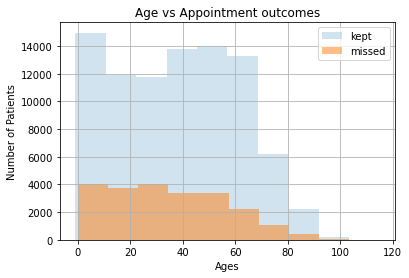

In [25]:
xvariable('Age', 'Age vs Appointment outcomes', 'Ages', 'Number of Patients');

> Generally, as shown in the chart, more patients between ages 0 and 38 missed appointment than those above 38

### Research Question 3: Is there any relationship between the number of SMS received and No-show outcome?

In [26]:
newdf['Sms_received'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Sms_received, dtype: int64

> **The number of sms received are not equally distributed among patients. Nonetheless, no sms recorded the highest number, implying that there might be no relationship between the number of sms received and appointment outcome.

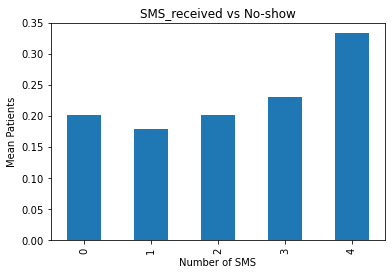

In [27]:
unigroupby ('Sms_received', 'SMS_received vs No-show', 'Number of SMS', 'Mean Patients')

##### It appears as though there might not be any relationship between the number of SMS and appointment outcomes since over 70% of the patients had no SMS yet they kept their appointment.

### Research Question 4: How does gender affect appointment outcomes?

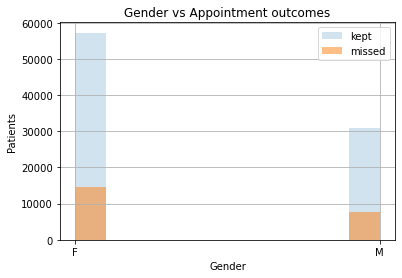

In [28]:
xvariable('Gender', 'Gender vs Appointment outcomes', 'Gender', 'Patients');

In [29]:
newdf['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

>  The number of female patients is significantly higher than males. Nonetheless, taking the total number into consideration, the percentage of female who kept appointment is less than the percentage of males who kept appointment. It seems that females are less likely than men to keep appointment.

### Research Question 5: Is alcoholism related to appointment outcomes?

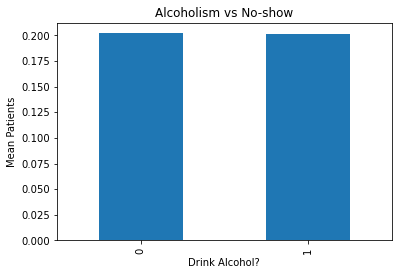

In [30]:
unigroupby ('Alcoholism', 'Alcoholism vs No-show', 'Drink Alcohol?', 'Mean Patients')

> Whether a patient drinks alcohol or not, they are almost equally likely to miss or keep appointment.

### Research Question 6 (To what extent does scholarship affect No-show outcomes?)

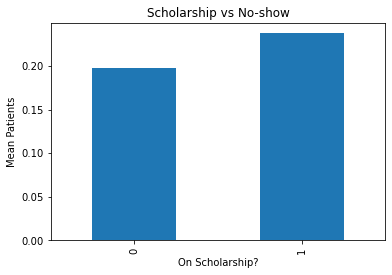

In [31]:
unigroupby ('Scholarship', 'Scholarship vs No-show', 'On Scholarship?', 'Mean Patients')

> Patients on scholarship are more likely to keep appointment

### Research Question 7: Which of the independent variables is more positively correlated with No-show?

In [32]:
a = newdf.corr()
a

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,Sms_received,No-show
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.012643,0.078033,-0.060319
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,-0.008586,0.029135
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,0.080083,-0.035701
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,-0.014550,0.057530,-0.015180
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,0.004648,-0.000196
Handicap,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,-0.024161,0.126431
Sms_received,0.078033,-0.008586,0.080083,0.057530,0.004648,-0.024161,1.000000,-0.006076
No-show,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,-0.006076,1.000000


<AxesSubplot:>

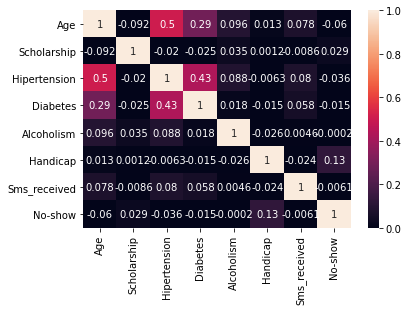

In [33]:
sns.heatmap(a, vmin=0, vmax=1, annot=True)

<a id='conclusions'></a>
## Conclusions

#### Summary of Findings

> At the end of the analysis, and responding to the questions posed at the start, the following were the findings:
    > 1. ##### Those with Hypertension are more likely than their counterpart to miss appointment, while those with diabetes are more slightly likely than their counterpart to keep appointment
    > 2. ##### Older people are more likely than younger ones to keep appointment
    > 3. ##### It appears as though there might not be any relationship between the number of SMS and appointment outcomes since over 70% of the patients had no SMS yet they kept their appointment.
    > 4. ##### The number of female patients is significantly higher than males. Nonetheless, taking the total number into consideration, the percentage of female who kept appointment is less than the percentage of males who kept appointment. It seems that females are less likely than men to keep appointment.
    > 5. ##### Whether a patient drinks alcohol or not, they are almost equally likely to miss or keep appointment.
    > 6. ##### Those on scholarship are more likely to keep appointment
    > 7. ##### Handicapped patients are more positively correlated with appointment outcomes.

## Limitations

#### The following can be said to be some limitations of this process:
    
   1. Most variables with boolean data types limited the range of exploratory analysis
   2. The variables in my correlation table may show some correlation with one another but one does not necessarily cause the other. Therefore, it is recommended that further analyses be done to better understand the extent of the correlation.